# <b>1 <span style='color:#0050EF'>|</span>Project 1: Finance</b>

Objective: To create a machine learning model to predict thedefaulter and Non-defaulter by analyzing historical data.

Problem Statement:
In the financial industry, it is crucial for lenders to assess the creditworthiness of borrowers beforegranting loans or credit. Identifying potential defaulters, who are at higher risk of failing to repay their debts, can help mitigate financial losses and maintain a healthy lending portfolio. The goal of this project is to develop a predictive model that can accurately classify borrowers as defaulters or non-defaulters based on various financial and demographic factors. 


# <b>2 <span style='color:#0050EF'>|</span>Import Libraries</b>

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# <b>3 <span style='color:#0050EF'>|</span>Load Dataset</b>

In [11]:
# Load dataset
df = pd.read_csv("loan.csv")  

# <b>4 <span style='color:#0050EF'>|</span>Data Cleaning | EDA</b>

In [13]:
# Display first few rows
#print(df.head())
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [11]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())

# Check for class imbalance
print(df['default_status'].value_counts(normalize=True))

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   cred

In [355]:
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [13]:
#delete null values
df.dropna(inplace=True)

In [21]:
#df.duplicated().sum()  # Count duplicate rows

0

In [22]:
df.duplicated().sum()  # Count duplicate rows
df = df.drop_duplicates()  # Remove duplicates

In [24]:
# Define features and target
X = df.drop(columns=['customer_id', 'loan_id', 'application_date', 'approval_date', 
                     'disbursement_date', 'due_date', 'default_status'])
y = df['default_status']

In [26]:
# Identify column types
categorical_features = ['loan_type', 'employment_type', 'income_level', 
                        'gender', 'marital_status', 'education_level']
numerical_features = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score']

In [28]:
# Drop columns not useful for prediction
df = df.drop(columns=['customer_id', 'loan_id'])

In [30]:
#EDA #quick way to: Check class balance in your dataset. See if you have imbalanced data (important for model selection and evaluation).
dstatus = df.groupby('default_status')['default_status'].count()
dstatus

default_status
False    4001
True      999
Name: default_status, dtype: int64

In [50]:
# One-hot encode categorical features|objects data type
#df = pd.get_dummies(df, drop_first=True)

In [29]:
#df = df.drop(columns=['application_date', 'approval_date', 'disbursement_date', 'due_date'])

# <b>4 <span style='color:#0050EF'>|</span>Data Visualization</b>

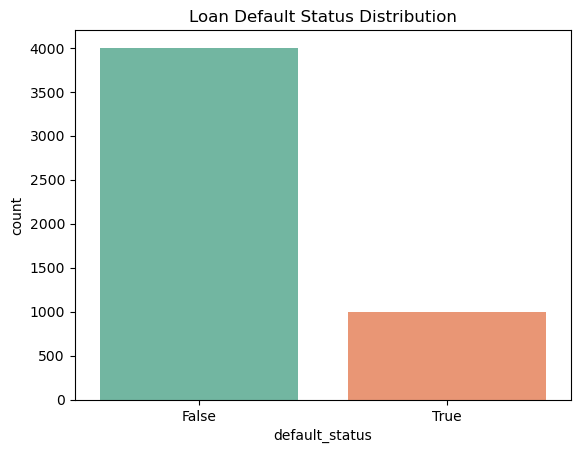

In [32]:
sns.countplot(data=df, x='default_status', palette='Set2')
plt.title("Loan Default Status Distribution")
plt.show()

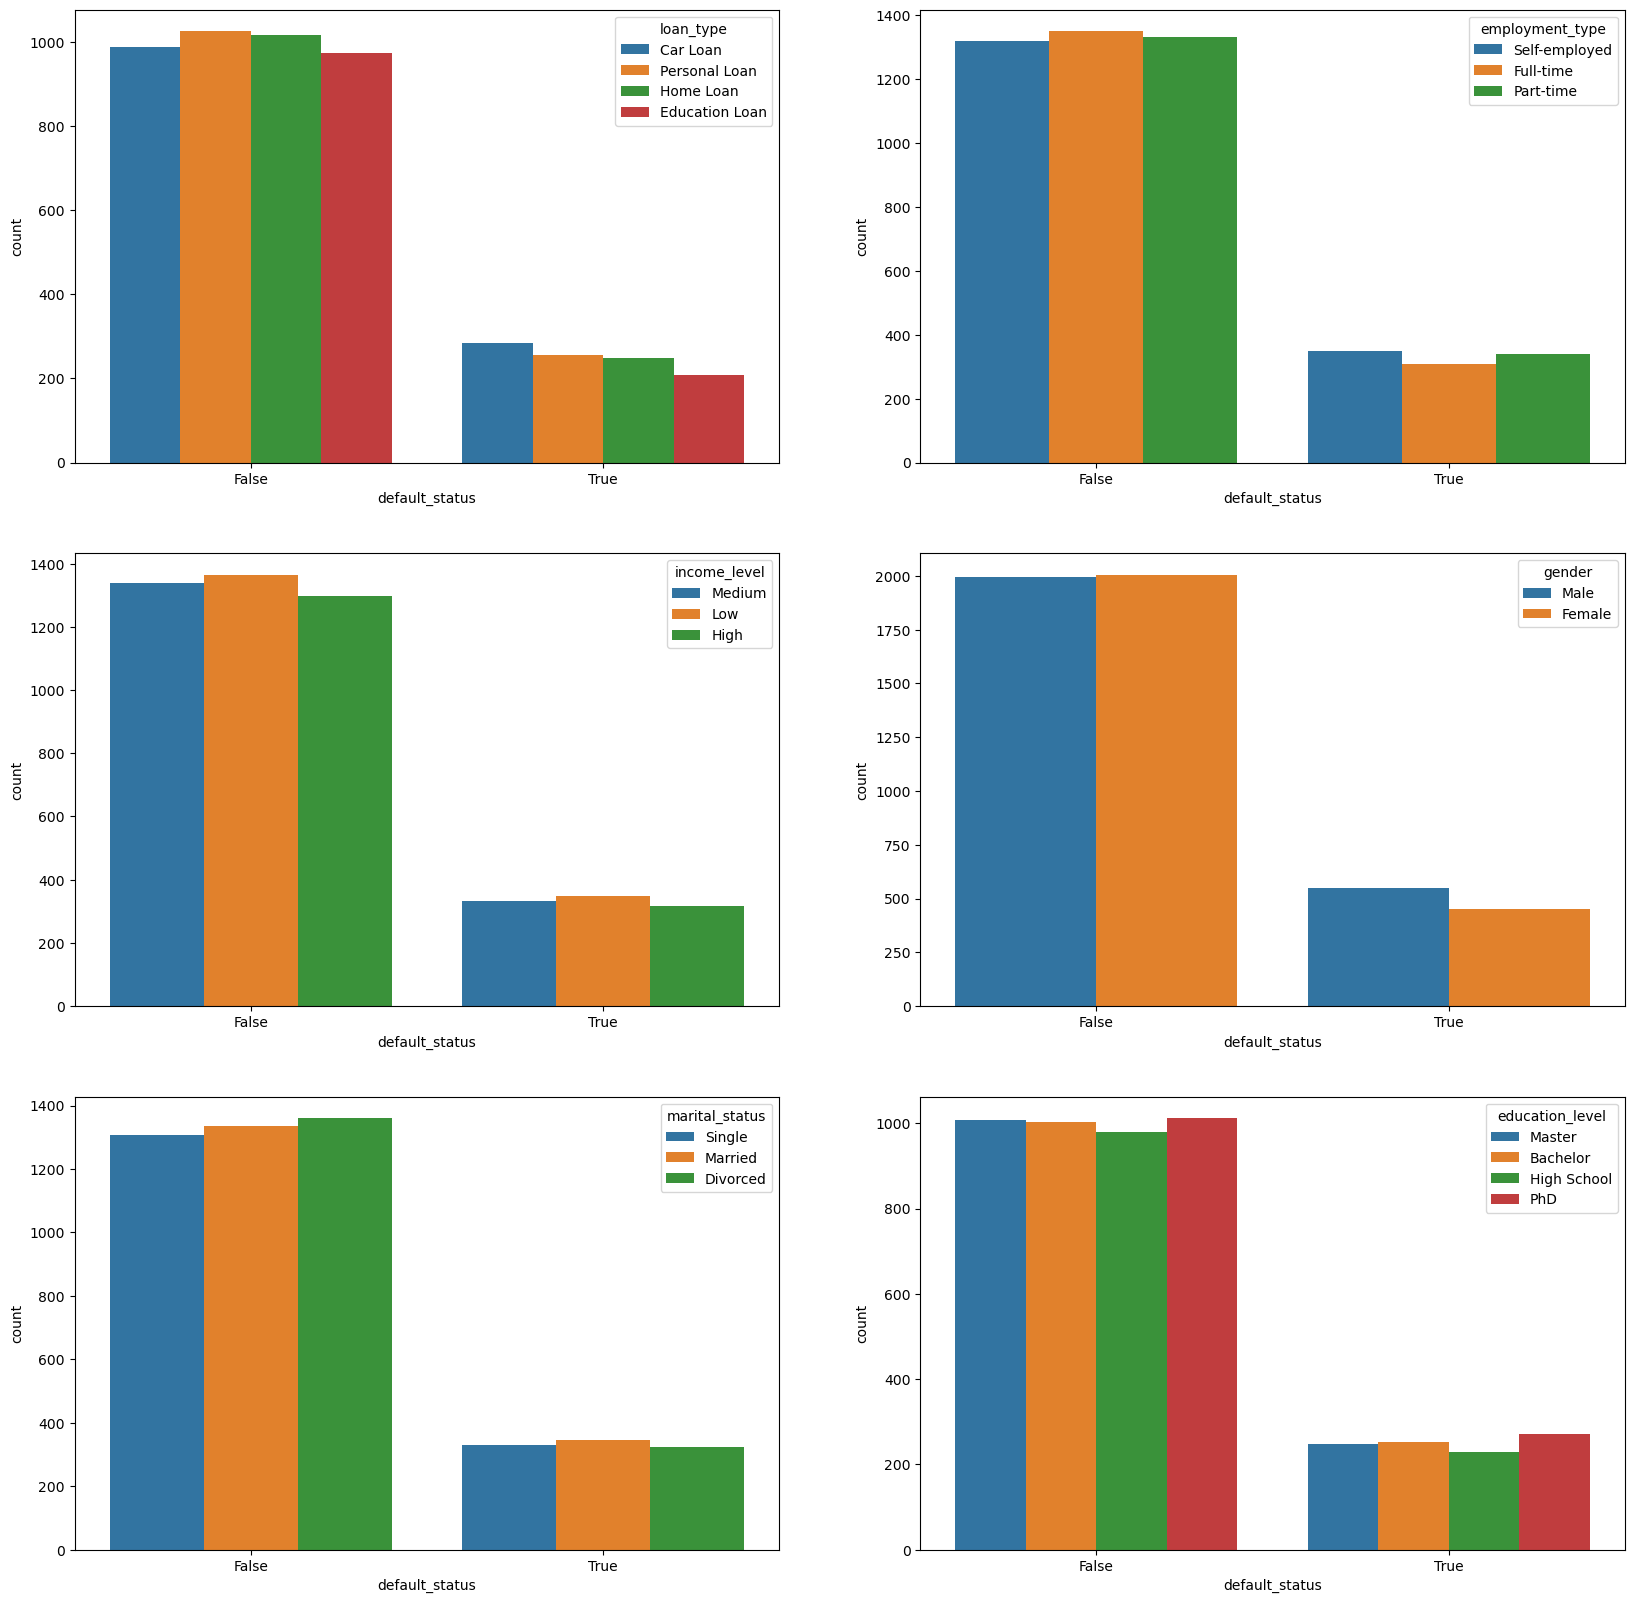

In [34]:
#Cheking the categorical variables and their impact on the status

# Removing object variable for analysis
categorical_var = [i for i in df.columns if df[i].dtypes =='object']
catVars_defstat = categorical_var[:-1]
annot = True

fig ,ax = plt.subplots(3,2,figsize=(20,20))
for axi ,var in zip(ax.flat,catVars_defstat):
    sns.countplot(x=df.default_status,hue=df[var],ax=axi)

sns.histplot(data=df, x='credit_score', hue='default_status', bins=30, kde=True, palette="husl")
plt.title("Credit Score Distribution by Default Status")
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_type          5000 non-null   object 
 1   loan_amount        5000 non-null   int64  
 2   interest_rate      5000 non-null   float64
 3   loan_term          5000 non-null   int64  
 4   employment_type    5000 non-null   object 
 5   income_level       5000 non-null   object 
 6   credit_score       5000 non-null   int64  
 7   gender             5000 non-null   object 
 8   marital_status     5000 non-null   object 
 9   education_level    5000 non-null   object 
 10  application_date   5000 non-null   object 
 11  approval_date      5000 non-null   object 
 12  disbursement_date  5000 non-null   object 
 13  due_date           5000 non-null   object 
 14  default_status     5000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 551.9+ KB


In [ ]:
#df['credit_risk'] = df['credit_score'].apply(lambda x: 'High Risk' if x < 650 else 'Low Risk')

#sns.countplot(data=df, x='credit_risk', hue='default_status', palette='mako')
#plt.title("Default Count by Credit Risk Group")
#plt.ylabel("Count")
#plt.show()

In [40]:
df['credit_risk'] = df['credit_score'].apply(lambda x: 'High Risk' if x < 700 else 'Low Risk')
count_cr = df.groupby('credit_risk')['credit_risk'].count()
count_cr

credit_risk
High Risk    3647
Low Risk     1353
Name: credit_risk, dtype: int64

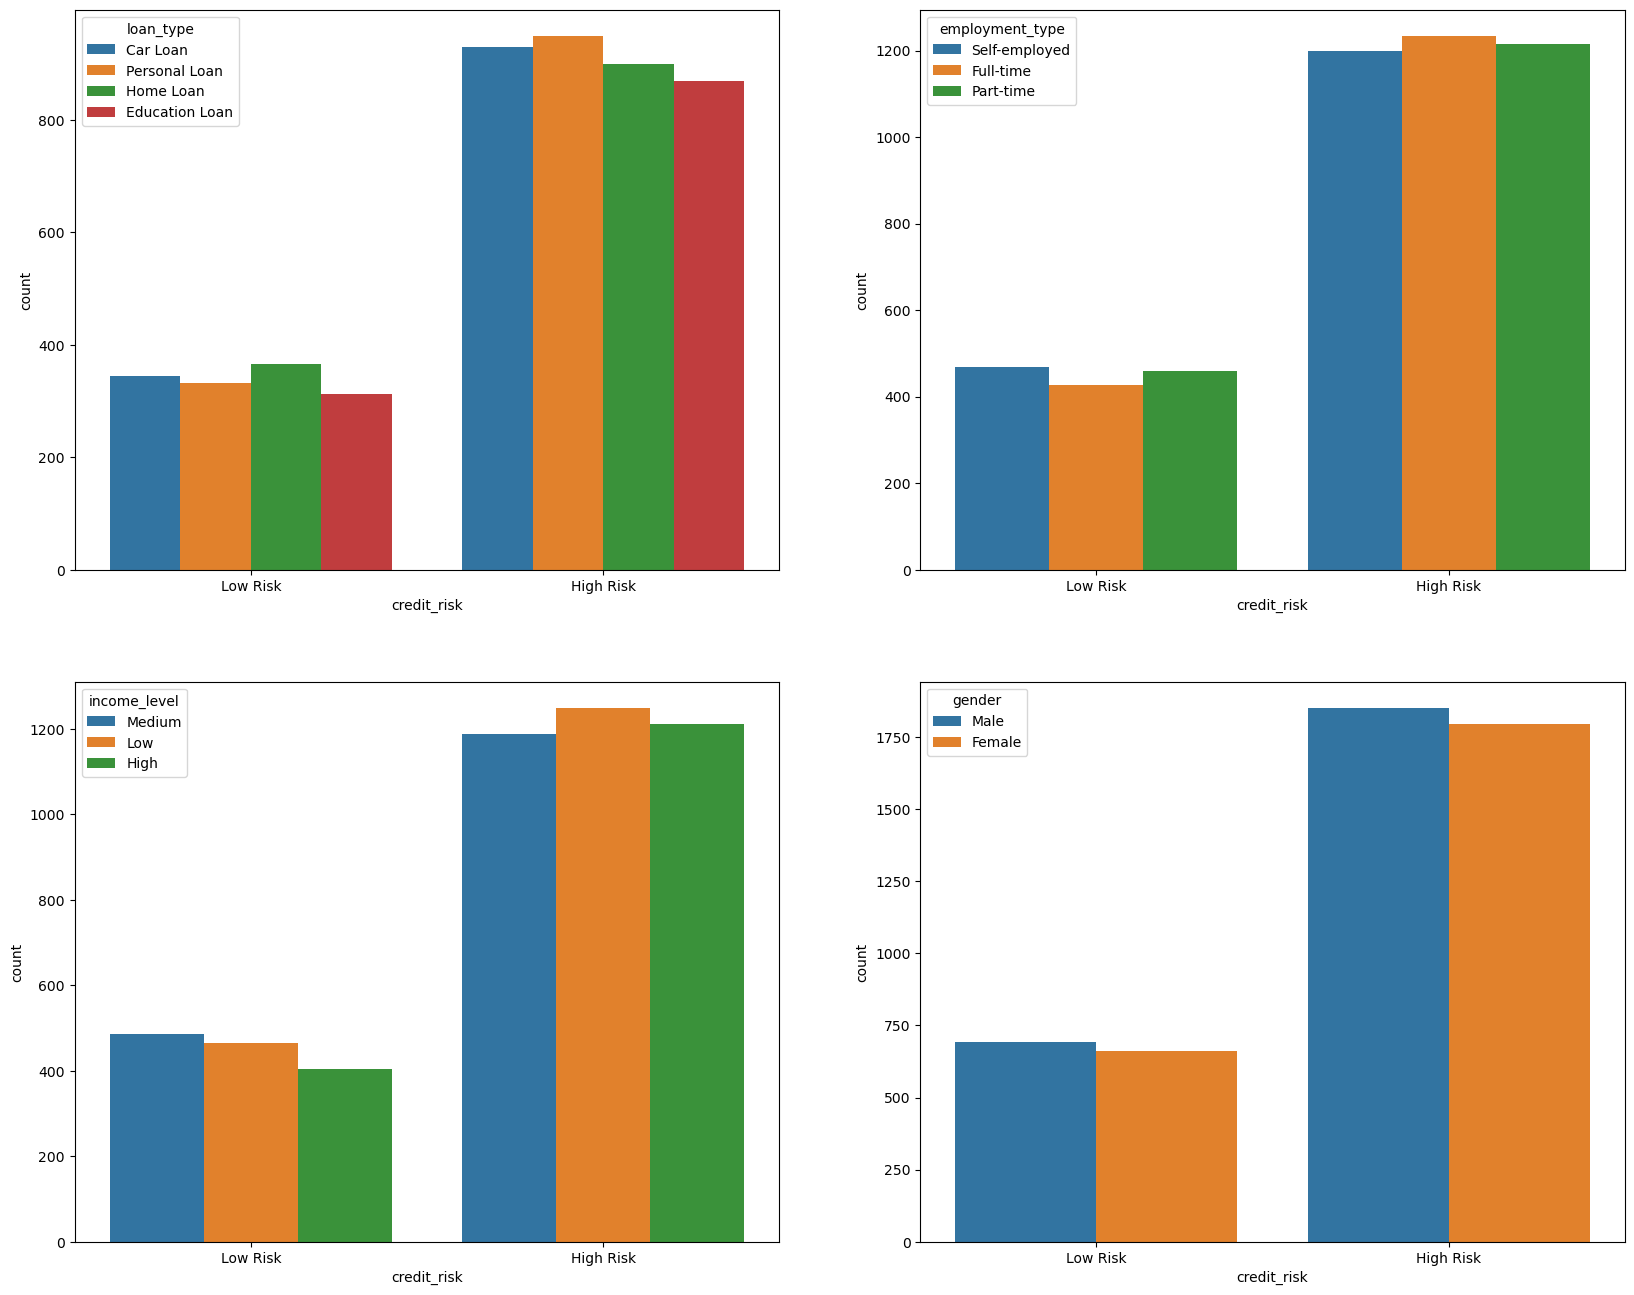

In [41]:
# Categorical variables and their impact on the status

# Removing object variable for analysis
categorical_var = [i for i in df.columns if df[i].dtypes =='object']
catVars_defstat = categorical_var[:-1]
annot = True

fig ,ax = plt.subplots(2,2,figsize=(20,16))
for axi ,var in zip(ax.flat,catVars_defstat):
    sns.countplot(x=df.credit_risk,hue=df[var],ax=axi)

In [44]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [ ]:
# Example: Select only numeric columns relevant for correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, annot=False)

# Manually add text annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=5)

plt.title("Correlation Analysis")
plt.show()

In [ ]:
print(correlation_matrix)

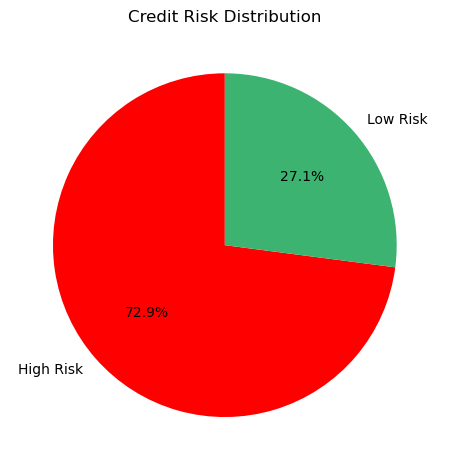

In [77]:
# Pie chart
count_cr.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'mediumseagreen'], startangle=90)
plt.title("Credit Risk Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.tight_layout()
plt.show()

In [79]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

gender [1 0]
default_status [0 1]
credit_risk [1 0]
loan_type_Education Loan [False  True]
loan_type_Home Loan [False  True]
loan_type_Personal Loan [False  True]
employment_type_Part-time [False  True]
employment_type_Self-employed [ True False]
income_level_Low [False  True]
income_level_Medium [ True False]
marital_status_Married [False  True]
marital_status_Single [ True False]
education_level_High School [False  True]
education_level_Master [ True False]
education_level_PhD [False  True]


In [81]:
df.head()

,loan_amount,interest_rate,loan_term,credit_score,gender,default_status,credit_risk,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,income_level_Low,income_level_Medium,marital_status_Married,marital_status_Single,education_level_High School,education_level_Master,education_level_PhD
0,16795,0.051852,15,833,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,1860,0.089296,56,776,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
2,77820,0.070470,51,697,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,55886,0.062155,30,795,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
4,7265,0.070635,48,519,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0


# <b>5 <span style='color:#0050EF'>|</span>Split the data and train the model</b>

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [ ]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=1000)
}


In [ ]:
# Store results
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else y_pred

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })


In [ ]:
# XGBoost model inside a pipeline
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [103]:
# Show results
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
print(results_df)

                 Model  Accuracy  F1 Score   ROC AUC
6       Neural Network     0.738  0.176101  0.536580
2        Random Forest     0.794  0.000000  0.525273
3              XGBoost     0.775  0.103586  0.523192
0  Logistic Regression     0.796  0.000000  0.508788
4                  KNN     0.762  0.137681  0.507504
1        Decision Tree     0.654  0.206422  0.492832
5                  SVM     0.796  0.000000  0.484801


🔍 Detailed Interpretation

>Logistic Regression / SVM

Accuracy: 0.796 – High, but both have F1 Score = 0.0, indicating very poor performance on minority class (e.g., defaulters). Likely predicts majority class only, leading to zero recall for the minority class.

>Random Forest / XGBoost(designed for structured/tabular data.High accuracy(Handles non-linear patterns, Robust to overfitting (with tuning)

Accuracy: 0.794 / 0.775 – Still decent.
F1 Score: 0.0 / 0.10 – Slightly better for XGBoost, but still weak.
Better ROC AUC (~0.52) – Slight improvement in probability-based classification.

>Decision Tree

Lowest Accuracy (0.654), but highest F1 Score (0.206) – this model captures minority class better, though at the cost of accuracy.
May be better if your goal is recall on defaulters.

> K-Nearest Neighbors (KNN)

Balanced profile – decent F1 (0.137) and ROC AUC (0.507), but not the best in any category.
May benefit from tuning- might perform better if you adjust its hyperparameters

>Neural Network

Lowest Accuracy (0.738) but best ROC AUC (0.537) and a modest F1 (0.176) – indicates it's better at scoring class probabilities, even if it misclassifies more overall.

Why ROC AUC is Useful: (ROC stands for Receiver Operating Characteristic curve.
AUC stands for Area Under the Curve.
It doesn't depend on the classification threshold.
Helps evaluate how well the model separates the classes (e.g., defaulters vs non-defaulters).
Good for imbalanced datasets where accuracy alone is misleading.


In [107]:
# Grid search parameters for XGBoost
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}

In [109]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [113]:
# Best model
best_model = grid_search.best_estimator_

In [115]:
# Predict and evaluate
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nBest Parameters:\n", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Best Parameters:
 {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.96      0.87       796
        True       0.24      0.04      0.07       204

    accuracy                           0.78      1000
   macro avg       0.52      0.50      0.47      1000
weighted avg       0.68      0.78      0.71      1000

ROC AUC Score: 0.5389324071337078


In [117]:
# Target variable
X = df.drop('default_status', axis=1)
y = df['default_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest - Initialize & Train the Model

In [121]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Predict and Evaluate the model

In [123]:
y_pred = rf_classifier.predict(X_test)

In [227]:
# Classification Report
#class (0 = non-defaulter, 1 = defaulter) using precision, recall, and f1-score.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       318
           1       1.00      0.01      0.03        75

    accuracy                           0.81       393
   macro avg       0.91      0.51      0.46       393
weighted avg       0.85      0.81      0.73       393



📌 What Each Metric Means:
🔸 Precision
"Of all predicted as class X, how many were actually class X?"

For class 0, 81% of predicted non-defaulters were truly non-defaulters.

For class 1, 100% of predicted defaulters were truly defaulters — but this is misleading (explained below).

🔸 Recall
"Of all actual class X, how many were correctly predicted?"

For class 0, all true non-defaulters were correctly predicted (100% recall).

For class 1, only 1% of actual defaulters were caught — a very poor performance.

🔸 F1-Score
The harmonic mean of precision and recall.

For class 0: Strong F1 = 0.90

For class 1: Very weak F1 = 0.03 — meaning the model almost completely fails to catch defaulters.

🔸 Support
Number of actual instances in the dataset for each class.

📊 Overall Metrics:
Metric        Value
Accuracy        81%
Macro Avg        Precision: 0.91, Recall: 0.51, F1: 0.46
Weighted Avg        Precision: 0.85, Recall: 0.81, F1: 0.73
Accuracy (81%) looks good but is misleading because:

The model performs well on majority class (non-defaulters).

It fails on minority class (defaulters).


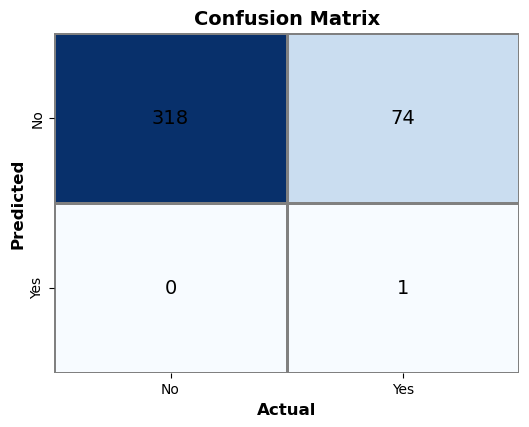

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(conf_mat.T,
                 annot=False,          # disable built-in annotations
                 fmt='d',
                 cmap='Blues',
                 linewidths=1,
                 linecolor='gray',
                 cbar=False,
                 vmin=0,
                 xticklabels=['No', 'Yes'],
                 yticklabels=['No', 'Yes'])

# Add annotations manually
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(conf_mat.T[i, j]),
                ha='center', va='center', color='black', fontsize=14)

# Label the axes
plt.xlabel('Actual', fontsize=12, fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.subplots_adjust(bottom=0.2)
plt.show()


### Get and plot features importances

In [125]:
# Creating the feature importances dataframe
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

<Axes: xlabel='feature_importance', ylabel='feature_names'>

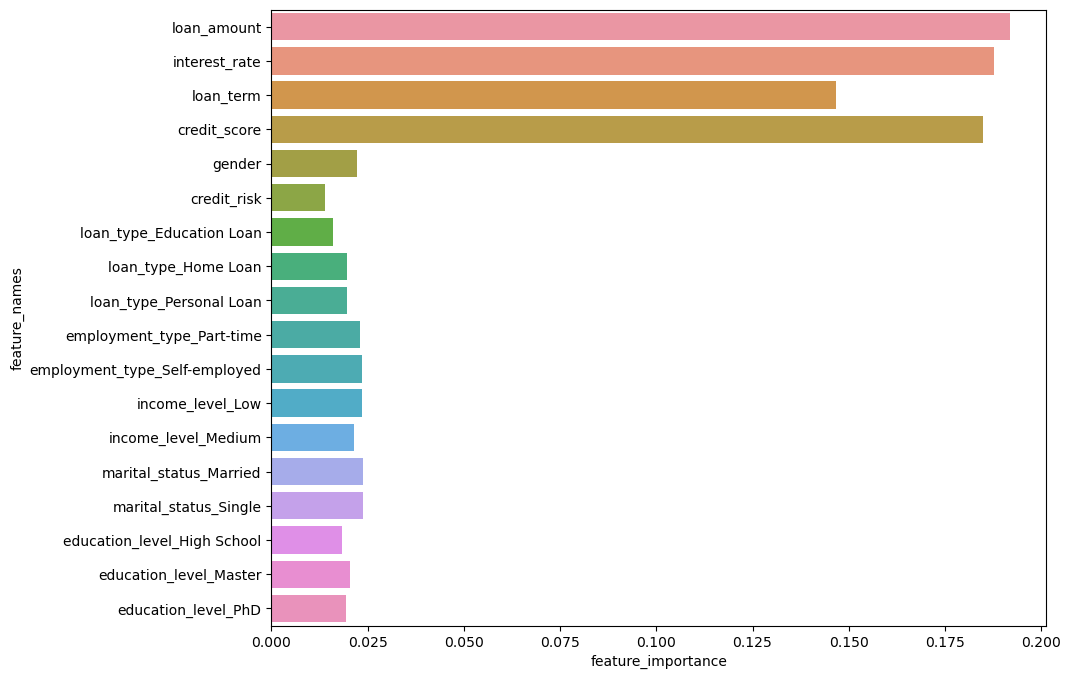

In [127]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])

###Analysis:
✅ What the Chart Shows:
The horizontal bars represent the importance (contribution) of each feature in making predictions.

The longer the bar, the more important the feature is to the model's decision-making process.

The x-axis shows the relative importance score (typically normalized to sum to 1).

🔍 Top Insights:
Most Important Features:
loan_amount, interest_rate, loan_term, and credit_score are the top 4 most influential features.

This means the model relies heavily on the financial characteristics of the loan when predicting default risk.

Moderate Impact:

gender, loan_type, and employment_type have a moderate influence, meaning demographic and loan category information has some predictive power.

Less Impactful Features:

income_level, marital_status, education_level, and credit_risk have minimal effect on the model’s predictions.

These may still contribute but are not as critical.

📊 Business Implications:
Borrowers with higher loan amounts, high-interest rates, and longer loan terms are more likely to influence the model’s prediction of default.

Credit score is a strong predictor — reinforcing its real-world relevance in credit risk modeling.

Sociodemographic variables (e.g., education, marital status) play a smaller role in this dataset, suggesting your model is mainly driven by financial behavior.


### Visualizing individual trees

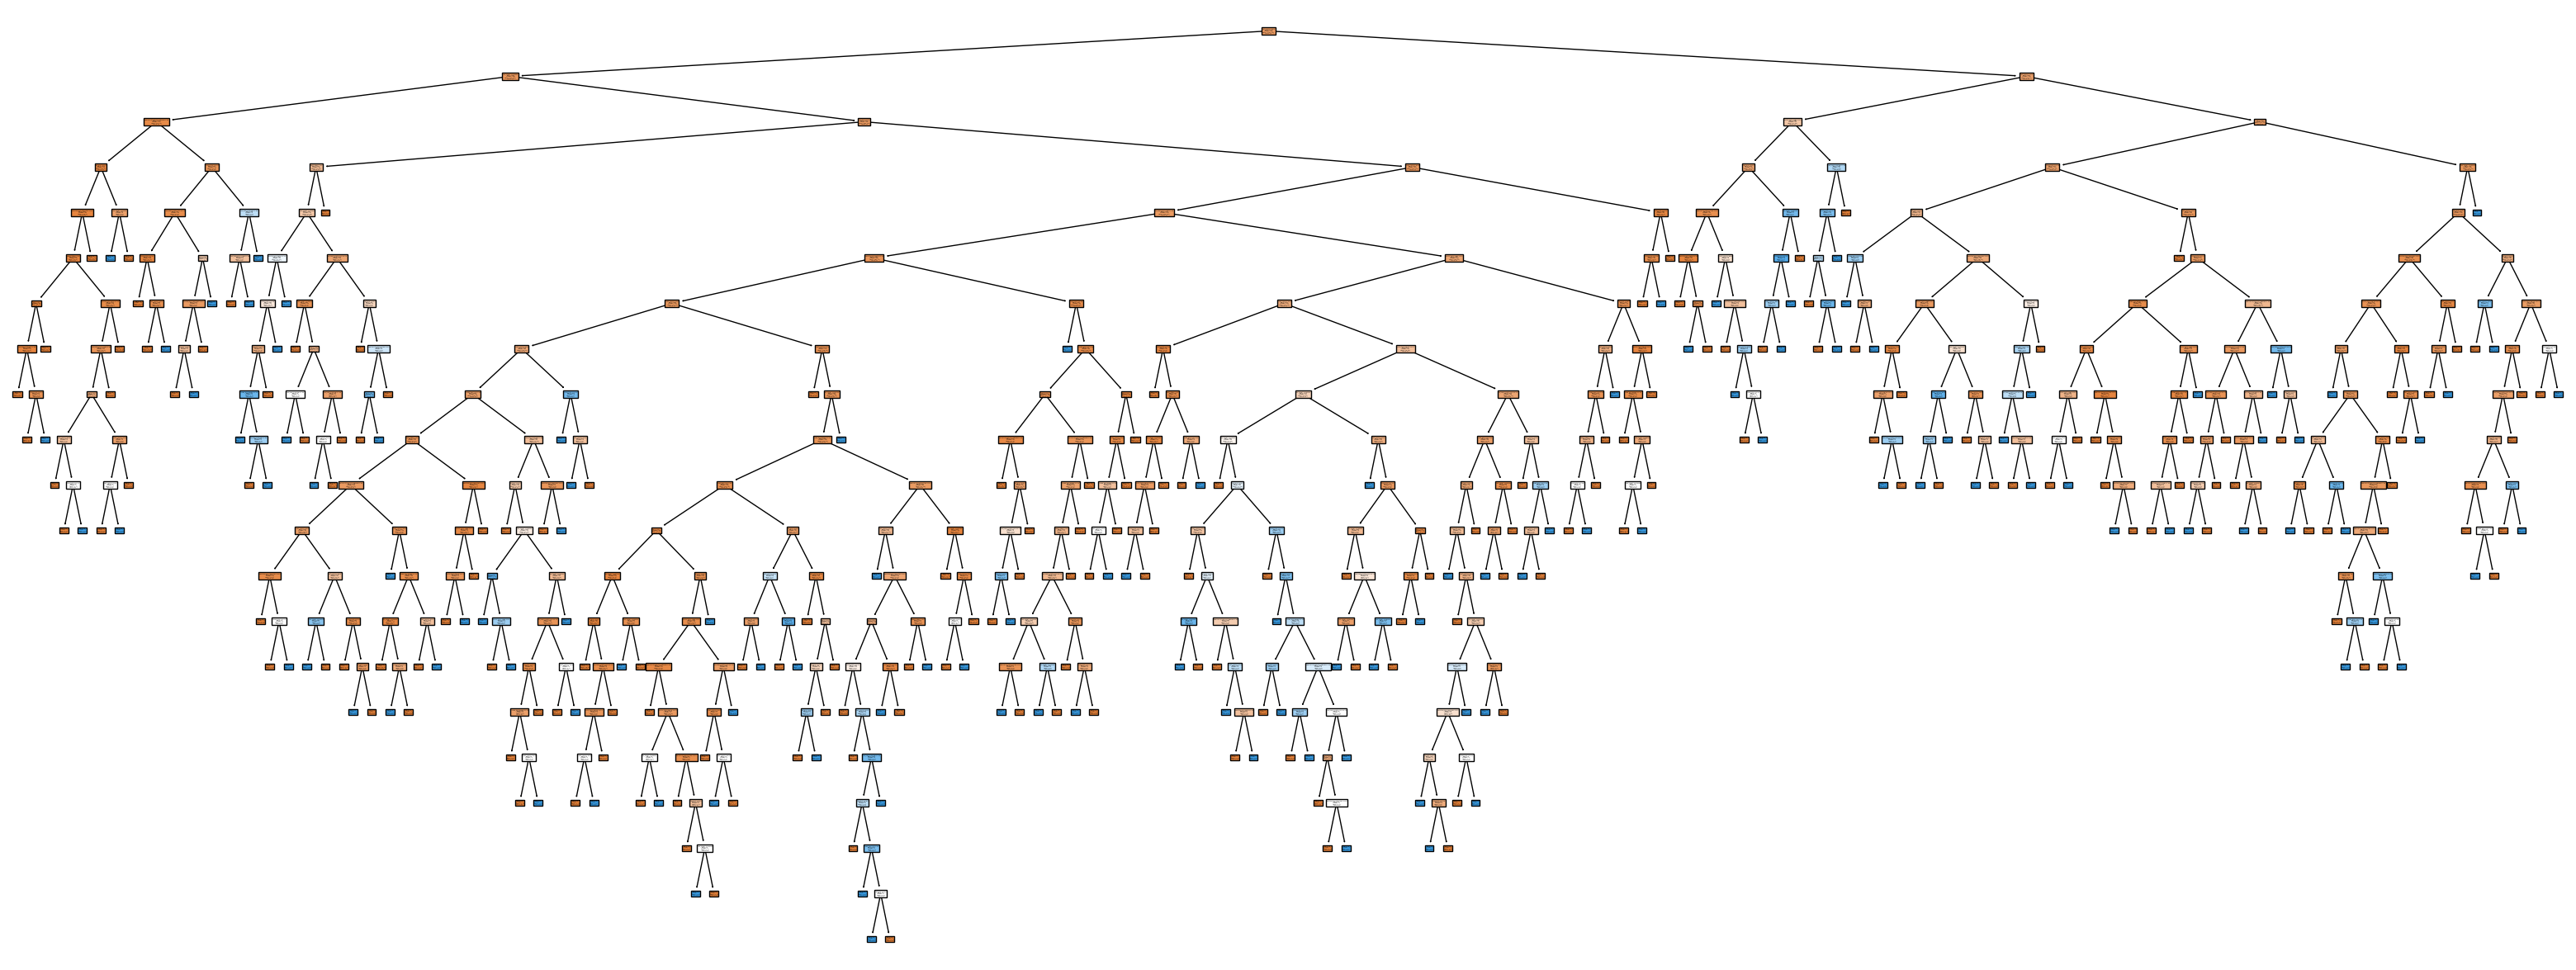

In [251]:
fn = df.columns
cn = ["Yes","No"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15))

tree.plot_tree(rf_classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('random_forest_tree.jpeg', format='jpeg',dpi=300)

In [261]:
from sklearn import tree
import matplotlib.pyplot as plt

#Plot only the top 3 levels
fig, ax = plt.subplots(figsize=(100,100))
tree.plot_tree(rf_classifier.estimators_[0],
              max_depth=3, #this limits the size
              feature_names=df.columns,
              class_names=["Yes" , "No"],
              filled=True)
plt.savefig("small_tree.jpeg")
plt.show()

### Visualizing SVM Model

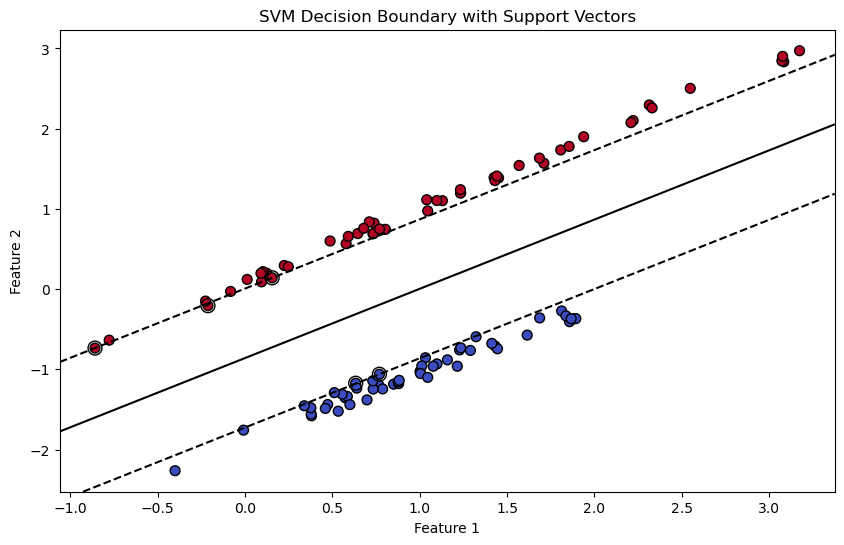

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate sample data (2 features only)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=100, random_state=42)

# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

# Create a mesh to plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(xy).reshape(xx.shape)

# Plot margin and support vectors
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
